In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.basemap import Basemap

In [7]:
file_path = "starplot.xlsx"

try:
    # Print the entire sheet
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    
    df = pd.read_excel(file_path)
    print(df)

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

      Name         RA        Dec   Mag
0    R0000  17.685884 -22.002223  1.79
1    R0001  23.034344  51.592469 -1.01
2    R0002  17.277470  57.810617  5.72
3    R0003  12.131324 -40.965129 -0.30
4    R0004  13.377952 -17.493943 -0.71
5    R0005   1.763844  -6.429323  4.82
6    R0006  11.238921  36.057159  3.01
7    R0007  10.894450 -17.112660  5.27
8    R0008   8.804061 -23.790559  0.37
9    R0009  23.718723  11.564758  3.39
10   R0010  16.466617  26.399142  0.64
11   R0011  10.126201   5.616964  0.39
12   R0012  17.626091   4.795434  3.30
13   R0013   4.002273 -11.927890  5.72
14   R0014   5.967880 -25.036568  1.71
15   R0015   9.749240 -49.985824  2.52
16   R0016  19.372993  66.159041  5.13
17   R0017  11.840825  55.395723  4.65
18   R0018  16.539190  41.574942  4.46
19   R0019  20.983985 -23.002045  1.35
20   R0020   6.669654   3.695702  4.75
21   R0021  20.502563   2.704676 -0.68
22   R0022   1.648527  -8.484632  5.25
23   R0023   7.373672 -31.755375 -0.94
24   R0024  15.004227  39

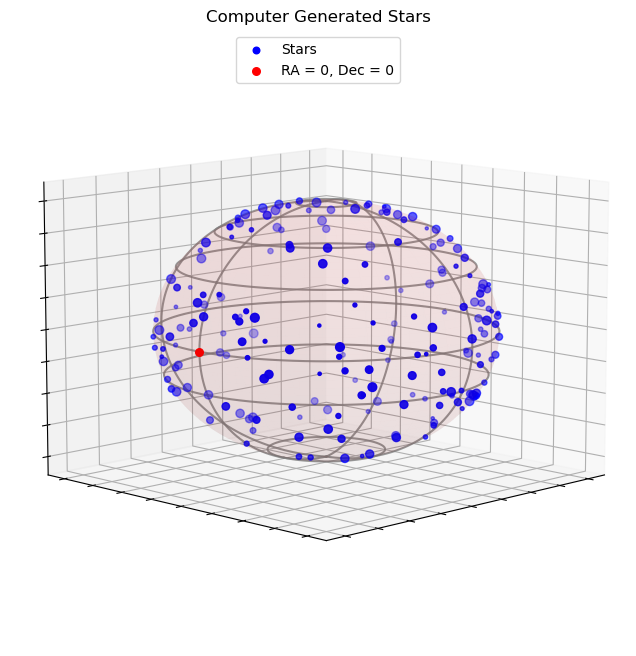

In [6]:
# Starchecker 1: A 3D projection of stars onto the celestial sphere.

df = pd.DataFrame(df)

#PLOTTING SECTION 1: data imports and alterations
# Convert right ascention to hrs, minutes, seconds
ra_rad = np.radians(df['RA'] * 15) 
dec_rad = np.radians(df['Dec'])

# Convert spherical coordinates to Cartesian coordinates (this is just for the python plotting)
x = np.cos(ra_rad) * np.cos(dec_rad)
y = np.sin(ra_rad) * np.cos(dec_rad)
z = np.sin(dec_rad)

#MAGNITUDE/SIZE RELATION SECTION
# Normalize magnitudes to determine the size of the stars
sizes = (df['Mag'] - df['Mag'].min()) / (df['Mag'].max() - df['Mag'].min())
# Define the size scale for the stars
min_size = 5
max_size = 40
# Calculate the size of each star based on its magnitude
star_sizes = min_size + (max_size - min_size) * sizes

#PLOTTING SECTION 2: formatting and additions to the figure
# Plotting on a sphere in Cartesian coordinates
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point in Cartesian coordinates with size based on magnitude
ax.scatter(x, y, z, color='blue', s=star_sizes, label='Stars')

# Plot the translucent sphere with radius 1 and center at the origin
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.05)

# Plot lines of longitude (meridians)
for ra in np.arange(0, 360, 100):
    ra_rad = np.radians(ra)
    x_line = np.cos(ra_rad) * np.sin(v)
    y_line = np.sin(ra_rad) * np.sin(v)
    z_line = np.cos(v)
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.8)

# Plot lines of latitude (parallels)
for dec in np.arange(-90, 180, 50):
    dec_rad = np.radians(dec)
    x_line = np.cos(u) * np.sin(dec_rad)
    y_line = np.sin(u) * np.sin(dec_rad)
    z_line = np.cos(dec_rad) * np.ones_like(u)
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.8)

# Plot the red point at RA = 0 and Dec = 0
ax.scatter(1, 0, 0, color='red', s=30, label='RA = 0, Dec = 0')

# Set title
ax.set_title('Computer Generated Stars')

# Adjusting the viewing angle
ax.view_init(elev=10, azim=45)  # Set the elevation and azimuth angles

# Remove axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Add legend
ax.legend(loc='upper center')

plt.show()

In [ ]:
#Starchecker 2 part 1: Separate the original dataframe into 2 dataframes, one with dec 